In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
path = "../../ots_mat/"

# Contains everything we need per model
models = {
    "vit_b_16": {"transformer": True},
    "swin_b": {"transformer": True},
    "beit_b_16": {"transformer": True},
    "deit_b_16": {"transformer": True},
    "vgg19": {"transformer": False},
    "resnet50": {"transformer": False},
    "efficientnetv2_m": {"transformer": False},
    "convnext_b": {"transformer": False}
}

In [8]:
for model in models:
    valFile = None
    for file in os.scandir(path):
        if file.is_file() and model in str(file.name) and "validation" in str(file.name):
            valFile = file.path
            break
    assert valFile != None, f"Could not find a validation file for {model}"
    models[model]["validate"] = valFile

In [44]:
# Adding path to validation and testing file for each model to the 'models' dict
def matchFile(dir, to_match):
    for file in os.scandir(dir):
        if file.is_file() and to_match in str(file.name):
            return file.path
    assert False, "Should never get here!!! Means some file is missing :-("

for model in models:
    models[model]["validate"] = matchFile(os.path.join(path, models[model]["dir"]), "validation")

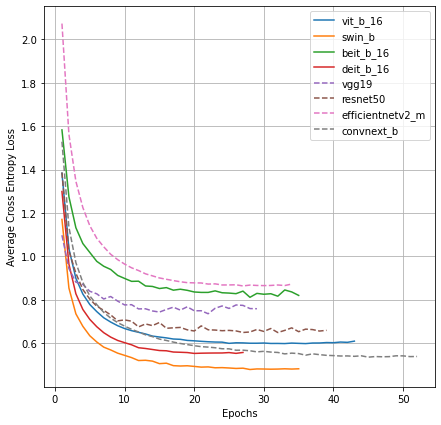

In [9]:
# Plotting validation loss
for model in models:
    df = pd.read_csv(models[model]["validate"])
    x = [idx + 1 for idx in range(len(df))]
    y = df["mean_loss"].to_list()
    ls = "-" if models[model]["transformer"] else "--"
    plt.plot(x, y, label=model, linestyle=ls)


plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Average Cross Entropy Loss")

fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

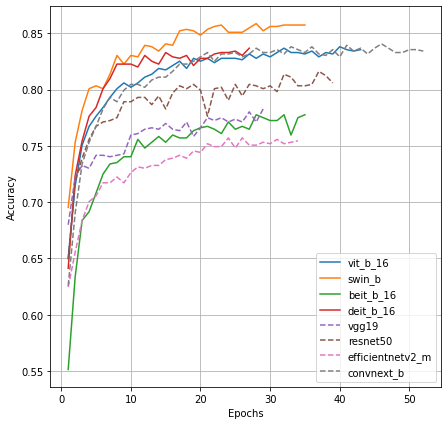

In [10]:
# Plotting validation accuracy
for model in models:
    df = pd.read_csv(models[model]["validate"])
    x = [idx + 1 for idx in range(len(df))]
    y = df["accuracy"].to_list()
    ls = "-" if models[model]["transformer"] else "--"
    plt.plot(x, y, label=model, linestyle=ls)


plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()